In [1]:
import jieba
import jieba.analyse
import pandas as pd

### 分詞

In [2]:
string2=['']
with open("hw1-dataset.txt", "r",encoding = 'utf-8') as f:
    data = f.read().splitlines()
    #print(data)
    #print(type(data))
    string2=data
stri = "".join(string2)
#print(stri)
string1 = jieba.lcut(stri,cut_all=False)
#print(string1)
#print(type(stri))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.616 seconds.
Prefix dict has been built successfully.


### 移除停留詞

In [3]:
new_list = []
def remove_stop_words(file_name,string1):
    with open(file_name,'r',encoding="utf-8") as f:
        stop_words = f.readlines()
    stop_words = [stop_word.rstrip() for stop_word in stop_words]
  
    for seg in string1:
        if seg not in stop_words:
            if seg == '\n':
                continue
            elif seg == '\t':
                continue
            elif seg == ' ':
                continue                
            else:
                new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
    return new_list

file_name = './停留詞.txt'
string1 = remove_stop_words(file_name,string1)
#print('remove_stop_words: ',string1)

### TF-IDF權重

In [4]:
tagWordArr = []
weightArr =[]

tags = jieba.analyse.extract_tags(stri, topK=100, withWeight=True)
for tag in tags:
    tagWordArr.append(tag[0])
    weightArr.append(tag[1])
    
#print(tagWordArr)
#print(weightArr)

### TF-IDF長條圖 

<BarContainer object of 100 artists>

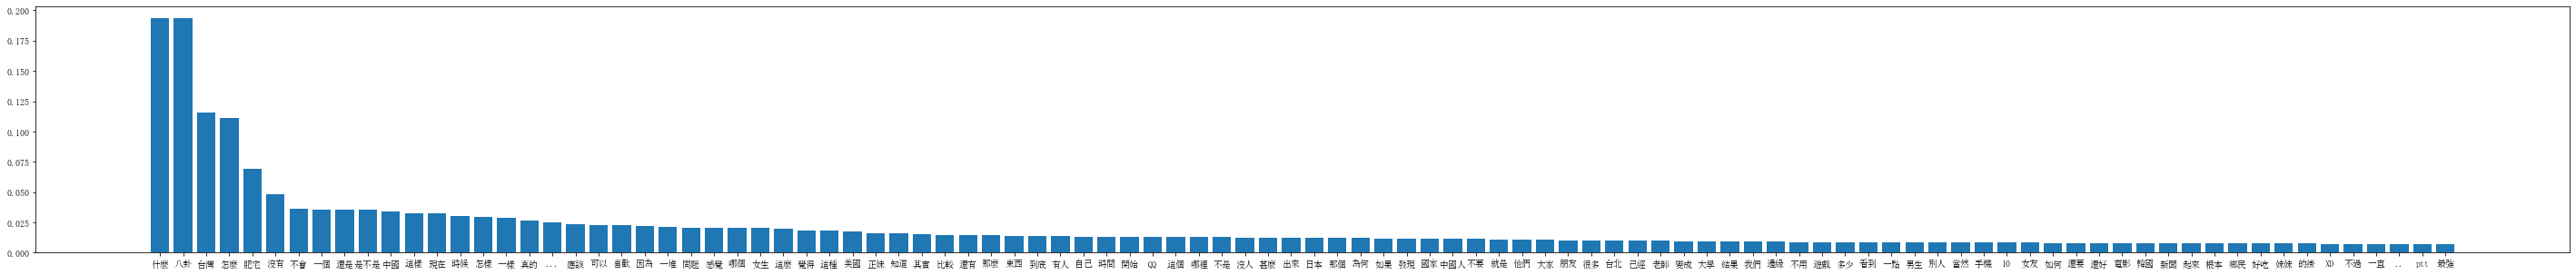

In [8]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("font",family='SimSun')
plt.figure(figsize=(50,5))
plt.bar(tagWordArr, weightArr)

### 詞頻統計

In [9]:
new={}
wordArr = []
countArr =[]
for word in string1:
    # 對原來的字典new中判斷是否有rword這個人，沒有就返回0，
    # 賦予rword鍵有就在原來rword所對應的值加1，並賦予rword鍵
    new[word]=new.get(word,0)+1
    
item=list(new.items())
item.sort(key=lambda x:x[1],reverse=True)
for i in range(100):
    word,count=item[i]
    wordArr.append(word)
    countArr.append(count)

### 頻率長條圖 

<BarContainer object of 100 artists>

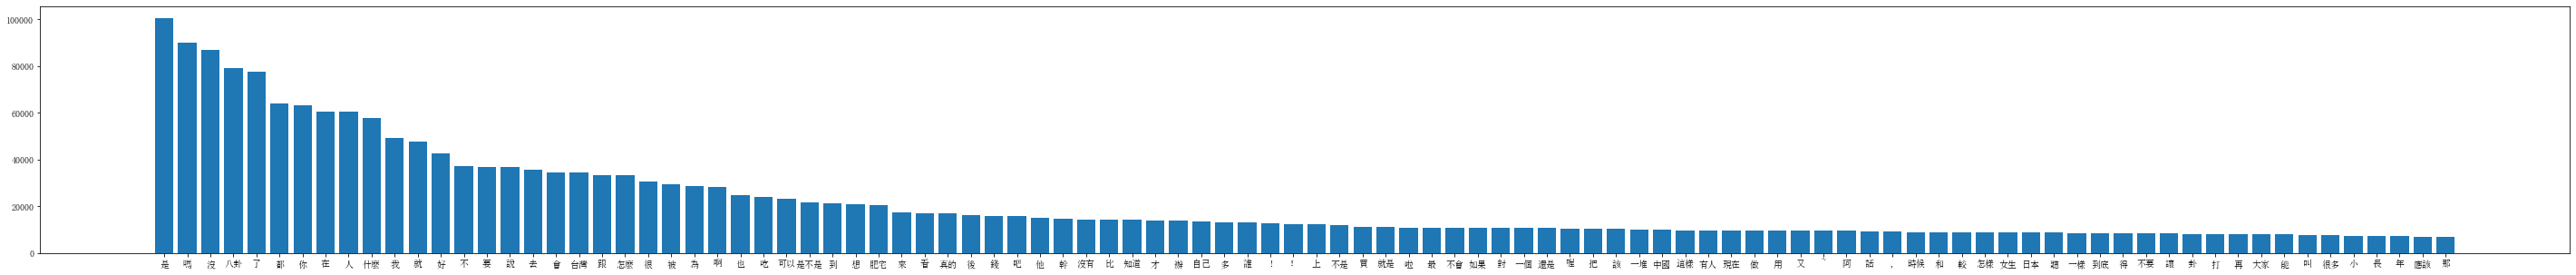

In [10]:
matplotlib.rc("font",family='SimSun')
plt.figure(figsize=(50,5))
plt.bar(wordArr, countArr, label = 'wordArr')